In [2]:
import os 
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PATH_IN = r'C:\\Users\\MI2RL-KHJ\\workspace_signal'

# files = []
# for filename in glob.glob('*.csv'):
#     files.append(filename)

In [3]:
# Make file name list 
# os.chdir('C:\\Users\\MI2RL-KHJ\\workspace_signal\\mit\\norm')
file_list = os.listdir(os.chdir('C:\\Users\\MI2RL-KHJ\\workspace_signal\\mit\\norm'))
mit_rpeaks = [rpeak for rpeak in file_list if rpeak.startswith("rpeak")]


processed_files = os.listdir(os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm'))
raw_lists = [raw for raw in processed_files if raw.startswith('raw')]
filtered_lists = [filtered for filtered in processed_files if filtered.startswith("filtered")]
hamilton_rpeaks = [rpeak for rpeak in processed_files if rpeak.startswith("correct")]

In [4]:
# sample 

def rpeak_extraction(raw, filtered, hamilton, mit, num):
    
    
    # load filtered, raw sample 
    os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm')
    filtered_sample = pd.read_csv(filtered, header=None)
    raw_sample = pd.read_csv(raw, header=None)

    # load hamilton rpeak
    hamilton_rpeak = list(pd.read_csv(hamilton, header=None)[0])    
    
    # load mit rpeak 
    os.chdir('C:\\Users\\MI2RL-KHJ\\workspace_signal\\mit\\norm')
    mit_rpeak = np.load(mit)
    
    # raw data + hamilton r-peak
    rh_xvals = []
    rh_yvals = [] 
    rm_xvals = []
    rm_yvals = [] 
    for i, sample in enumerate(list(raw_sample[0])):
#        if i <= 10000:
        if i in hamilton_rpeak:
            rh_xvals.append(i)
            rh_yvals.append(sample)

        if i in mit_rpeak:
            rm_xvals.append(i)
            rm_yvals.append(sample)
                
    # filtered data + hamilton r-peak
    fh_xvals = []
    fh_yvals = [] 
    fm_xvals = []
    fm_yvals = [] 
 
    for i, sample in enumerate(filtered_sample[0]):
#         if i <= 10000:
        if i in hamilton_rpeak:
            fh_xvals.append(i)
            fh_yvals.append(sample)

        if i in mit_rpeak:
            fm_xvals.append(i)
            fm_yvals.append(sample)

#    pngname = mit.split('.')[0].split('rpeak_')[1]

    # 저장 시 사용 (새로운 r-peak value에 대한 file만들기)
#     os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\rpeak_values')
#     hr = pd.DataFrame({'rh_xvals': rh_xvals, 'rh_yvals':rh_yvals, 'fh_xvals': fh_xvals, 'fh_yvals':fh_yvals}, columns=['rh_xvals','rh_yvals', 'fh_xvals', 'fh_yvals'])
#     #hr.to_save('hamilton.csv', mode='w')
#     hr.to_csv('hamilton_{}.csv'.format(num), mode='w')
#     mr = pd.DataFrame({'rm_xvals': rm_xvals, 'rm_yvals':rm_yvals, 'fm_xvals': fm_xvals, 'fm_yvals':fm_yvals}, columns=['rm_xvals','rm_yvals', 'fm_xvals', 'fm_yvals'])
#     mr.to_csv('mit_{}.csv'.format(num), mode='w')#, header=False)
                  
    
# 여기서는 필요 없어요
#     return rh_xvals, rh_yvals, rm_xvals, rm_yvals, fh_xvals, fh_yvals, fm_xvals, fm_yvals
    #%matplotlib inline
#     os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_norm')
#     fig = plt.figure(figsize=(20, 8))
#     ax = fig.subplots(1)
#     ax.plot(filtered[:10000], 'salmon', label='Filtered')
#     ax.plot(raw[:10000], 'lightskyblue', linestyle= '--', label='Raw')
#     ax.plot(fh_xvals, fh_yvals, 'r+', label='F_Ham')
#     ax.plot(rh_xvals, rh_yvals, 'k+', label ='R_Ham')
#     ax.plot(fm_xvals, fm_yvals, 'g+', label='F_MIT')
#     ax.plot(rm_xvals, rm_yvals, 'b+', label='R_MIT')
#     ax.legend()
#     plt.grid(True)
#     plt.savefig(pngname+'.png')

In [5]:
# 전체 rpeak-extraction file 만들기, 또는 변수 만들기

for i in range(len(raw_lists)):
    print('processing: {}====>'.format(i))
    rpeak_extraction(raw_lists[i], filtered_lists[i], hamilton_rpeaks[i], mit_rpeaks[i], raw_lists[i].split('.csv')[0].split('_')[-1])

processing: 0====>


KeyboardInterrupt: 

In [6]:
PATH_IN = r'C:\Users\MI2RL-KHJ\workspace_signal\mit\rpeak_values'
tmp = pd.read_csv(os.path.join(PATH_IN, 'mit_00.csv'), index_col='Unnamed: 0')

In [19]:
PATH_IN = r'C:\Users\MI2RL-KHJ\workspace_signal\mit\processed_arrx'
arrx_rpeak = pd.read_csv(os.path.join(PATH_IN, 'correct_rpeaks_test_arrx_ecg_arrx_08.csv'), header=None)#, index_col='Unnamed: 0')
fxvals = pd.read_csv(os.path.join(PATH_IN, 'filtered_test_arrx_ecg_arrx_08.csv'), header=None)

In [ ]:
# dataframe -> list 
fxvals = fxvals[0].tolist()

In [61]:
col =('brpeak', 'rpeak', 'arpeak')
#df = pd.DataFrame(columns)
df = pd.DataFrame(columns =('brpeak', 'rpeak', 'arpeak'))# = ('product', 'criteria', 'content', 'criteria_index','full_content'))

for i in range(len(arrx_rpeak)):
    rpeak = arrx_rpeak.loc[i].values
    brpeak = rpeak - 15  # 15 points before rpeak 
    arpeak = rpeak + 15  # 15 points after rpeak 
    tmp = pd.DataFrame({'brpeak': brpeak, 'rpeak': rpeak, 'arpeak':arpeak}, index=[i])# , columns=col)
    df = df.append(tmp)
    #print(df)

In [62]:
df

,brpeak,rpeak,arpeak
0,90.0,105.0,120.0
1,443.0,458.0,473.0
2,791.0,806.0,821.0
3,1119.0,1134.0,1149.0
4,1156.0,1171.0,1186.0
...,...,...,...
566,214318.0,214333.0,214348.0
567,214696.0,214711.0,214726.0
568,215080.0,215095.0,215110.0
569,215455.0,215470.0,215485.0


In [118]:
df['rpeak'].loc[i]

105.0

### R-peak -+ 15 smaple points 

In [196]:
intervals = []
rs = []
for i in range(len(arrx_rpeak)):
    interval = fxvals[int(df['brpeak'].loc[i]):int(df['arpeak'].loc[i])]
    r = fxvals[int(df['rpeak'].loc[i])]
    rs.append(r)
    intervals.append(interval)

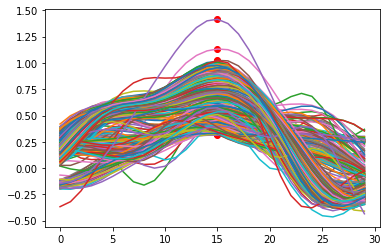

In [199]:
for i in range(len(arrx_rpeak)):
    plt.plot(intervals[i])
    plt.scatter(len(intervals[i])/2,rs[i], c='r')

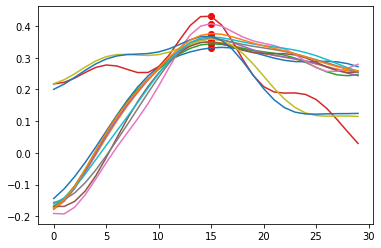

In [201]:
for i in range(len(arrx_rpeak)):
    plt.plot(intervals[i])
    plt.scatter(len(intervals[i])/2,rs[i], c='r')
    if i > 10:
        break

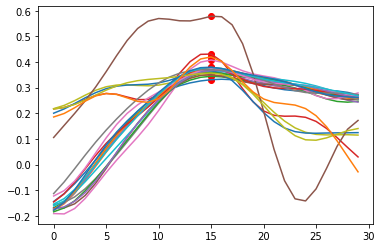

In [202]:
for i in range(len(arrx_rpeak)):
    plt.plot(intervals[i])
    plt.scatter(len(intervals[i])/2,rs[i], c='r')
    if i > 20:
        break

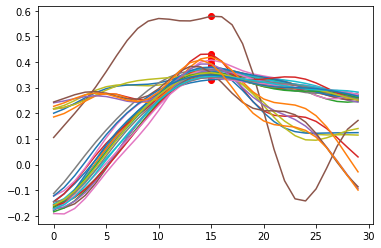

In [203]:
for i in range(len(arrx_rpeak)):
    plt.plot(intervals[i])
    plt.scatter(len(intervals[i])/2,rs[i], c='r')
    if i > 30:
        break

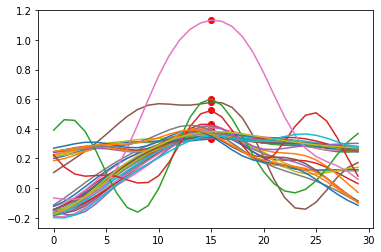

In [204]:
for i in range(len(arrx_rpeak)):
    plt.plot(intervals[i])
    plt.scatter(len(intervals[i])/2,rs[i], c='r')
    if i > 40:
        break

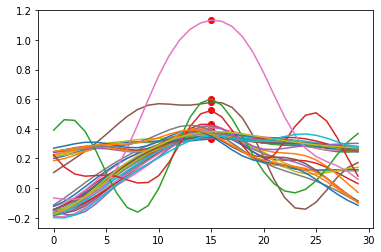

In [205]:
for i in range(len(arrx_rpeak)):
    plt.plot(intervals[i])
    plt.scatter(len(intervals[i])/2,rs[i], c='r')
    if i > 40:
        break

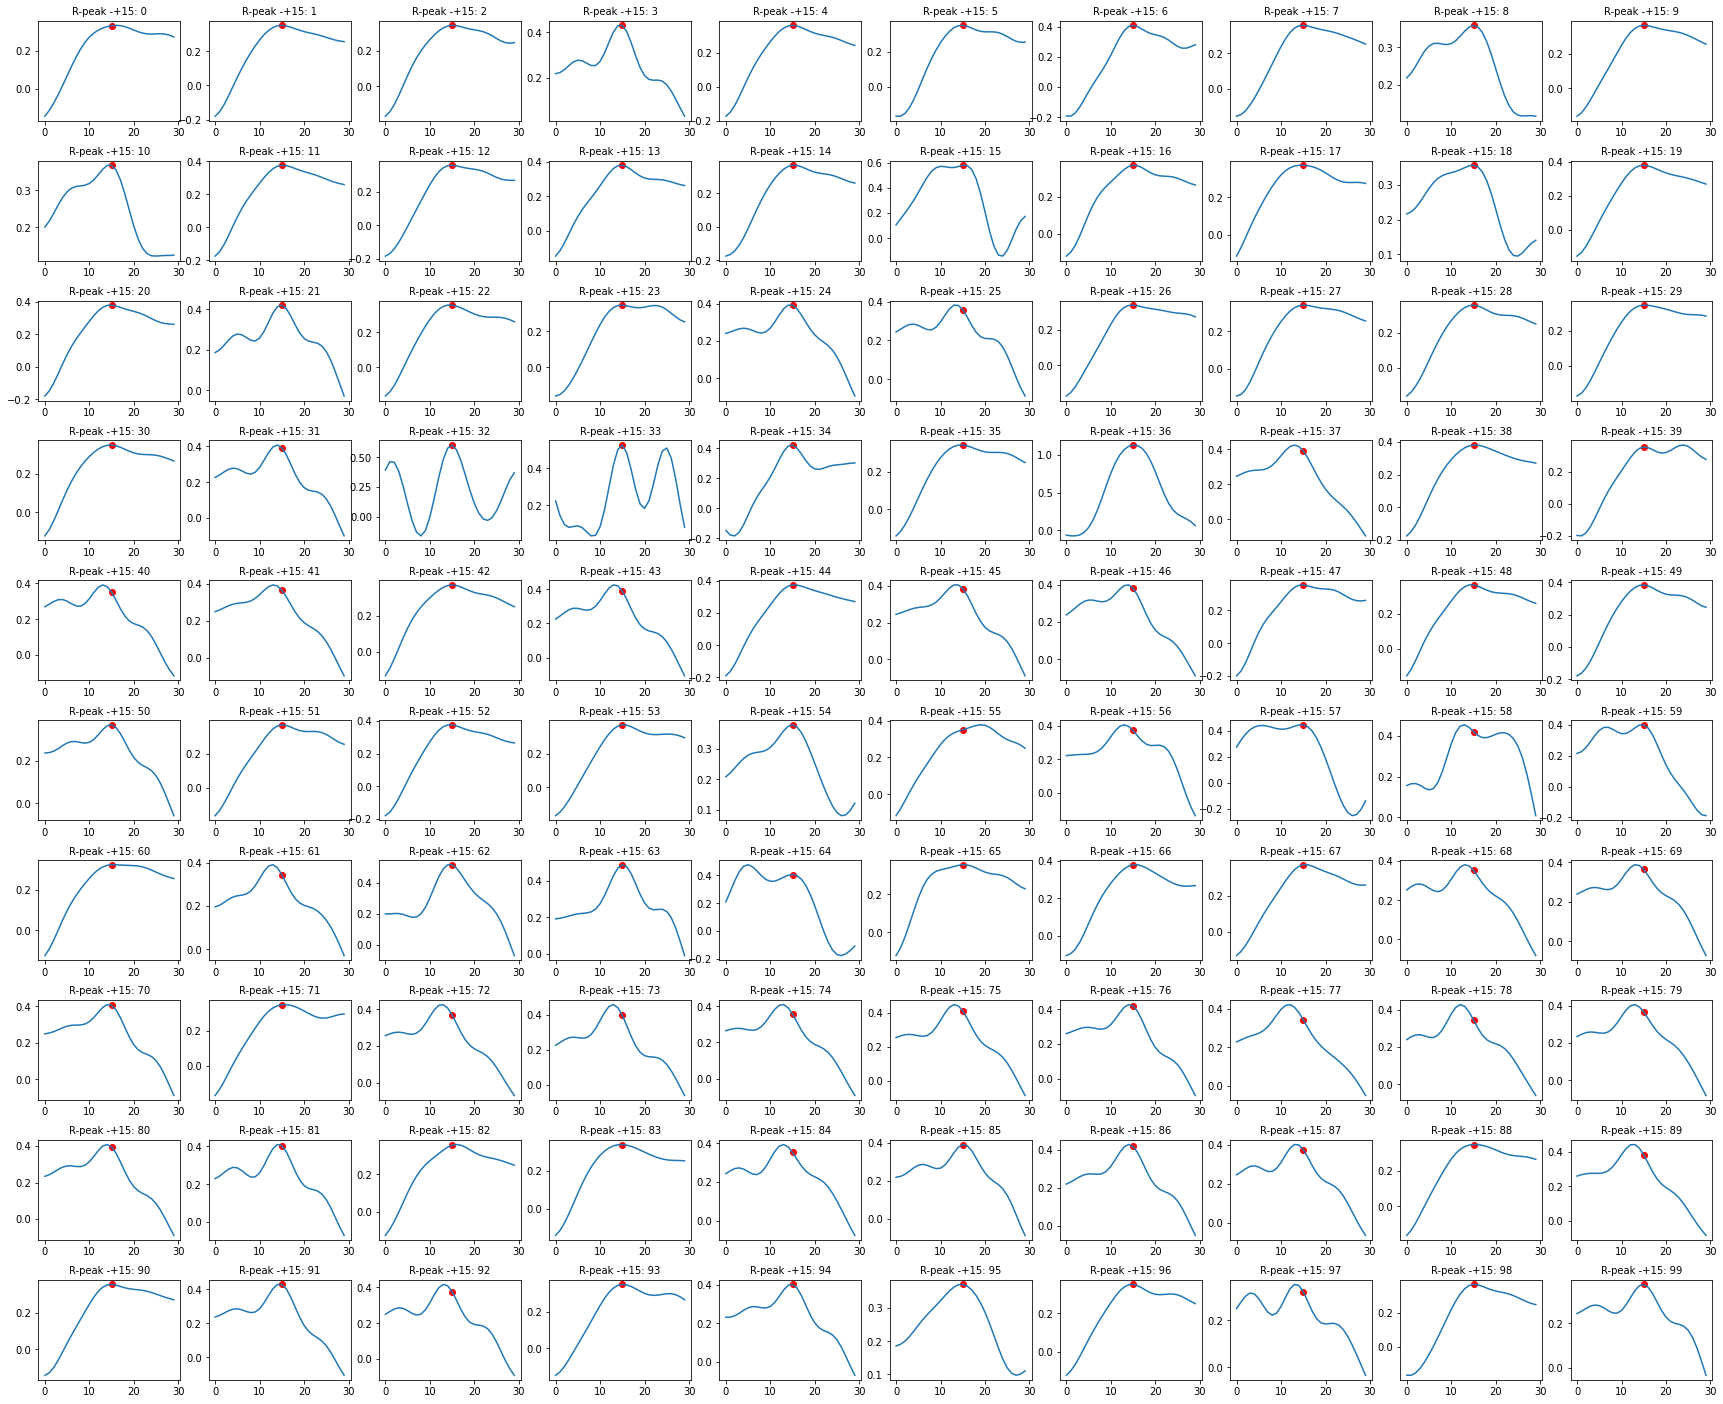

In [226]:
plt.figure(figsize=(30,25))
n = 1 

for i in range(len(arrx_rpeak)):
    ax = plt.subplot(10,10, n)
    plt.subplots_adjust(hspace = 0.4)
    plt.title('R-peak -+15: {}'.format(i), fontsize=10)
    ax.plot(intervals[i])
    ax.scatter(len(intervals[i])/2,rs[i], c='r')
    n+=1
    if i == 99:
        break

plt.show()

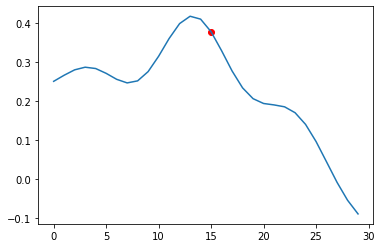

In [227]:
for i in range(len(arrx_rpeak)):
    if i == 92:
        plt.plot(intervals[i])
        plt.scatter(len(intervals[i])/2,rs[i], c='r')

### R-peak: -+ 95 sample points

In [228]:
intervalsa = []
rs = []

for i in range(len(arrx_rpeak)):
    intervala = fxvals[int(df['brpeak'].loc[i]-80):int(df['arpeak'].loc[i]+80)]
    r = fxvals[int(df['rpeak'].loc[i])]
    rs.append(r)
    intervalsa.append(intervala)

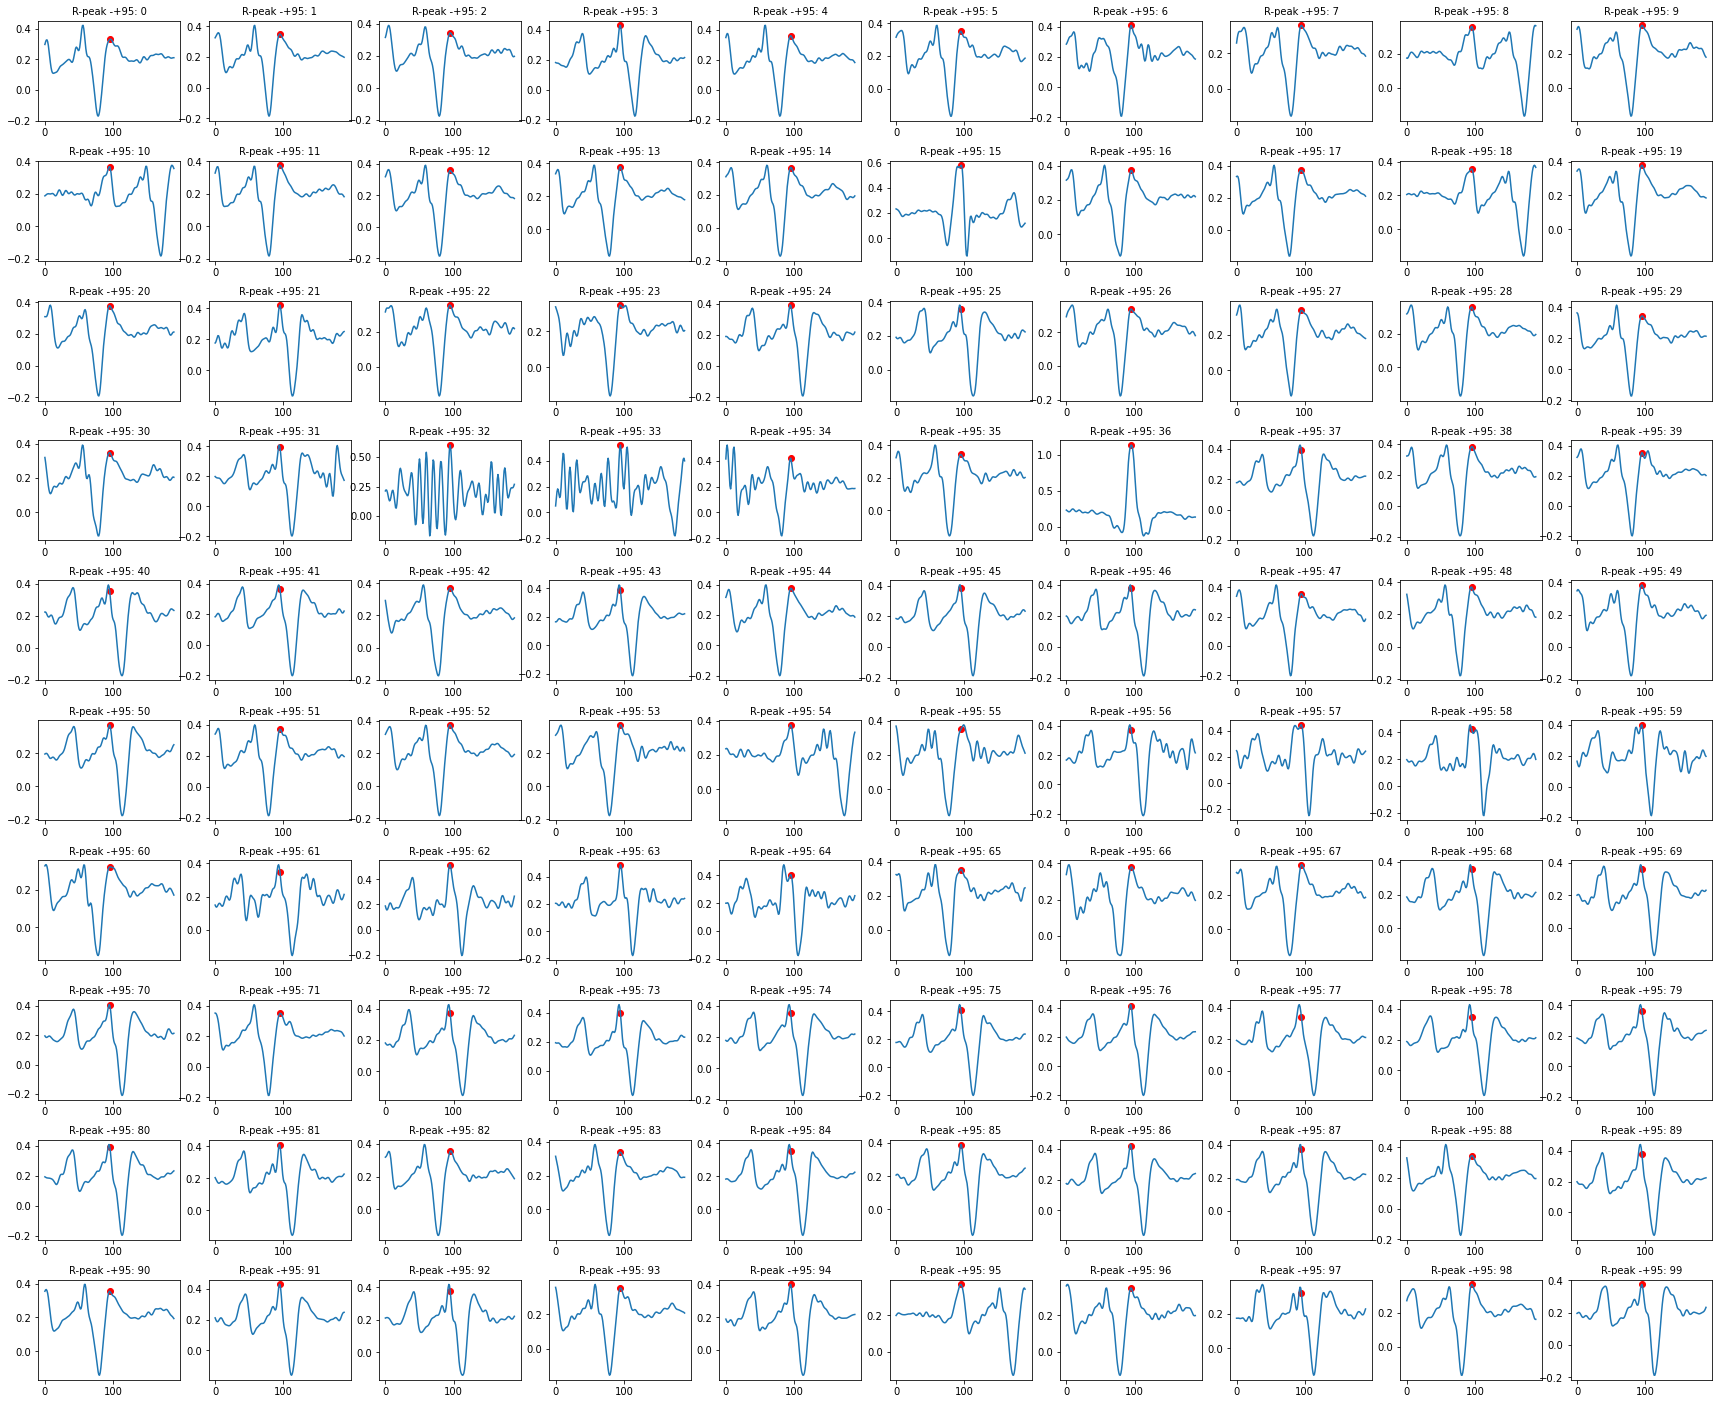

In [230]:
plt.figure(figsize=(30,25))
n = 1 

for i in range(len(arrx_rpeak)):
    ax = plt.subplot(10,10, n)
    plt.subplots_adjust(hspace = 0.4)
    plt.title('R-peak -+95: {}'.format(i), fontsize=10)
    ax.plot(intervalsa[i])
    ax.scatter(len(intervalsa[i])/2,rs[i], c='r')
    n+=1
    if i == 99:
        break

plt.show()

### R-peak -+ 20 smaple points 

In [232]:
intervalsb = []
rs = []

for i in range(len(arrx_rpeak)):
    intervalb = fxvals[int(df['brpeak'].loc[i]-5):int(df['arpeak'].loc[i]+5)]
    r = fxvals[int(df['rpeak'].loc[i])]
    rs.append(r)
    intervalsb.append(intervalb)

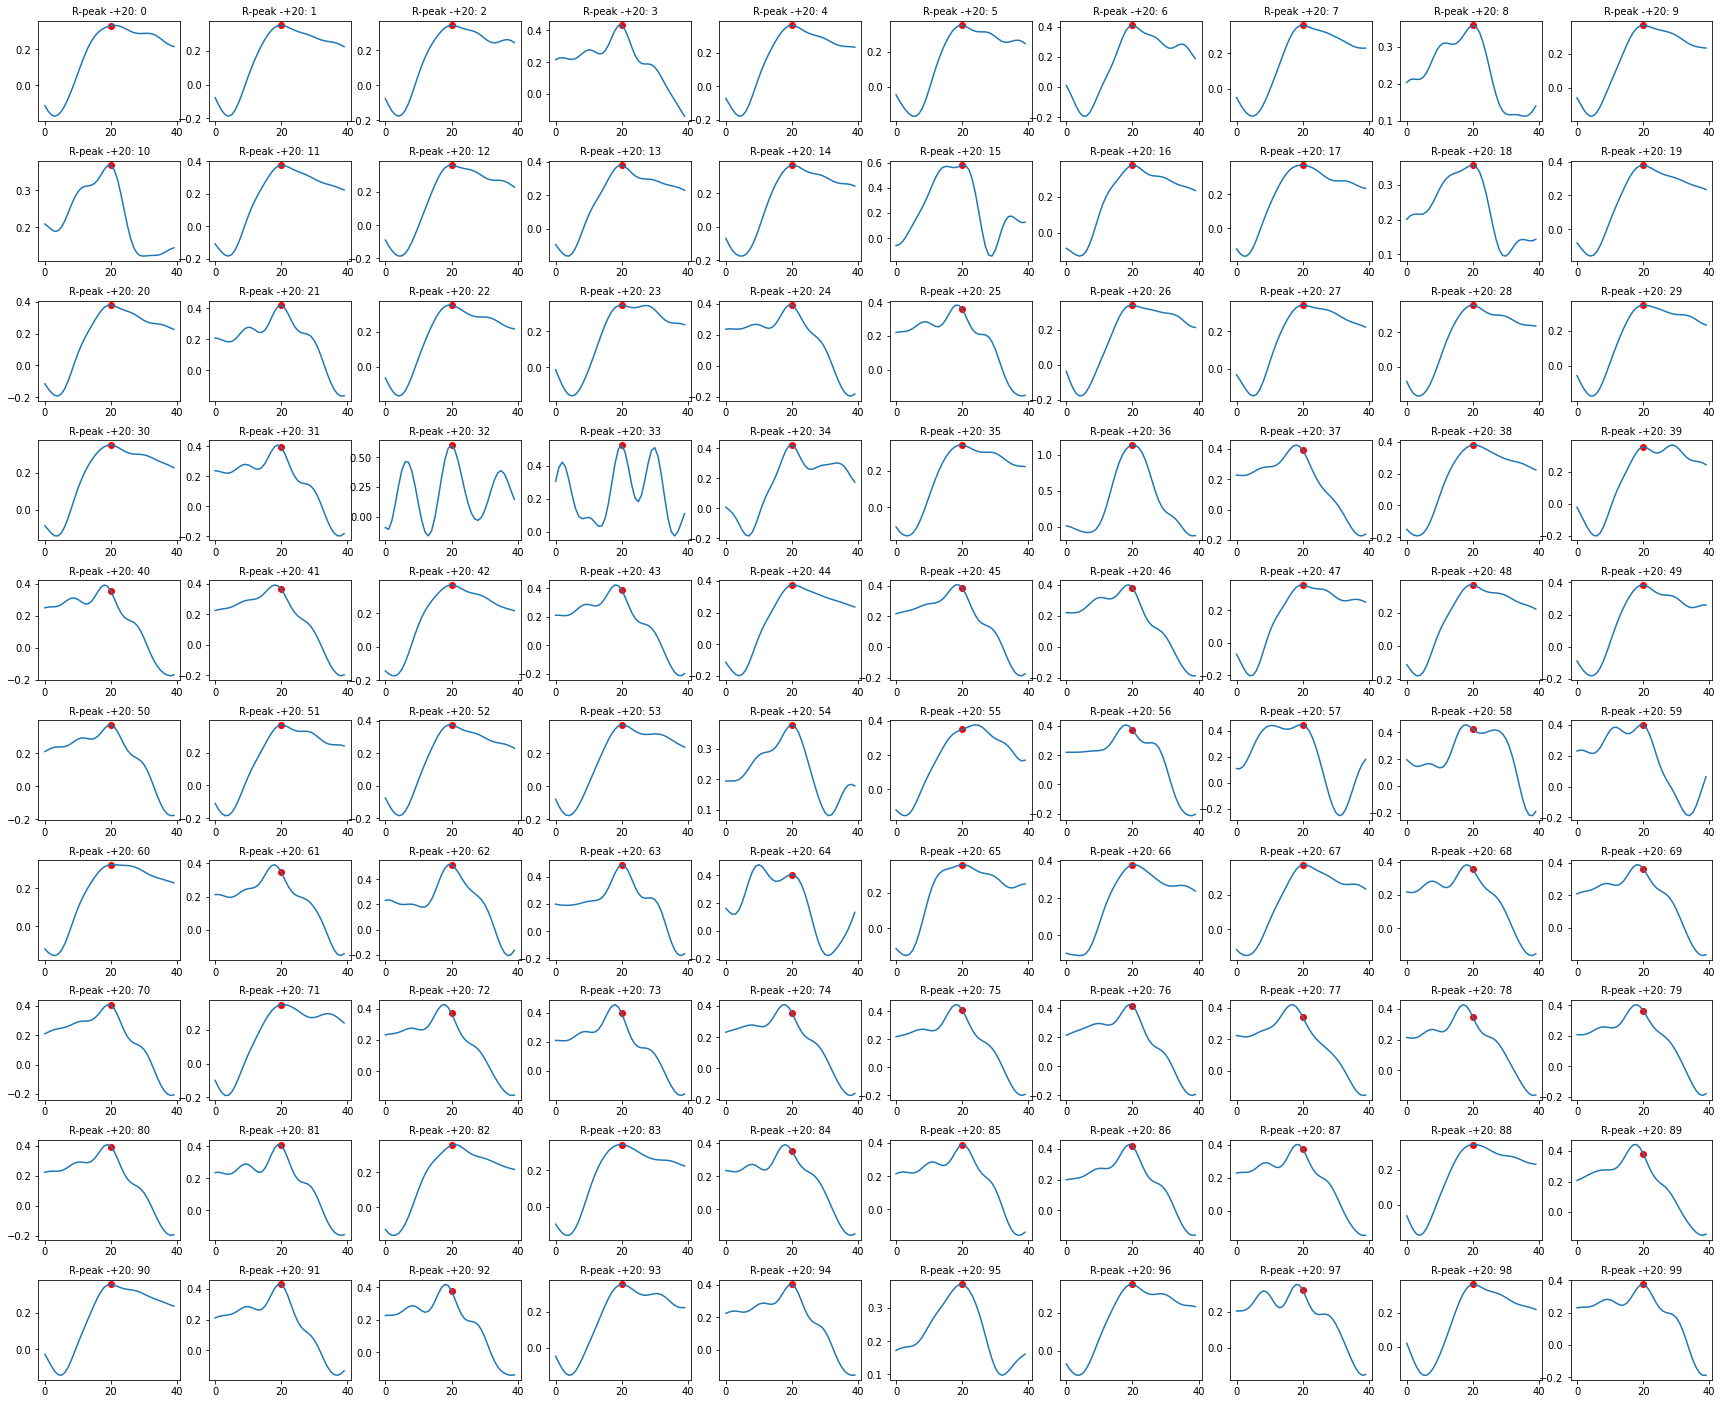

In [233]:
intervalsb = []
rs = []

for i in range(len(arrx_rpeak)):
    intervalb = fxvals[int(df['brpeak'].loc[i]-5):int(df['arpeak'].loc[i]+5)]
    r = fxvals[int(df['rpeak'].loc[i])]
    rs.append(r)
    intervalsb.append(intervalb)


plt.figure(figsize=(30,25))
n = 1 
for i in range(len(arrx_rpeak)):
    ax = plt.subplot(10,10, n)
    plt.subplots_adjust(hspace = 0.4)
    plt.title('R-peak -+20: {}'.format(i), fontsize=10)
    ax.plot(intervalsb[i])
    ax.scatter(len(intervalsb[i])/2,rs[i], c='r')
    n+=1
    if i == 99:
        break

plt.show()

In [289]:
from scipy.spatial import distance

dist_base = np.median(intervalsb)
b_dists=[]
for i in range(len(intervalsb)):
    b_dist = distance.euclidean(intervalsb[i], dist_base)
    b_dists.append(b_dist)

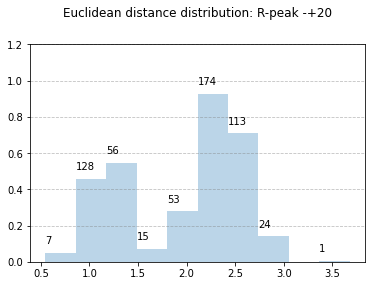

In [290]:
density, bins, _ = plt.hist(b_dists, density=True, alpha=0.3)# , hspace = 0.4)
count_, _ = np.histogram(b_dists, bins)
plt.title('Euclidean distance distribution: R-peak -+20', y=1.1)
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')
plt.ylim(0,1.2)

for x, y, num in zip(bins, density, count):
    if num != 0:
        plt.text(x, y+0.05, num)

In [234]:
intervalsc = []
rs = []

for i in range(len(arrx_rpeak)):
    intervalc = fxvals[int(df['brpeak'].loc[i]-10):int(df['arpeak'].loc[i]+10)]
    r = fxvals[int(df['rpeak'].loc[i])]
    rs.append(r)
    intervalsc.append(intervalc)

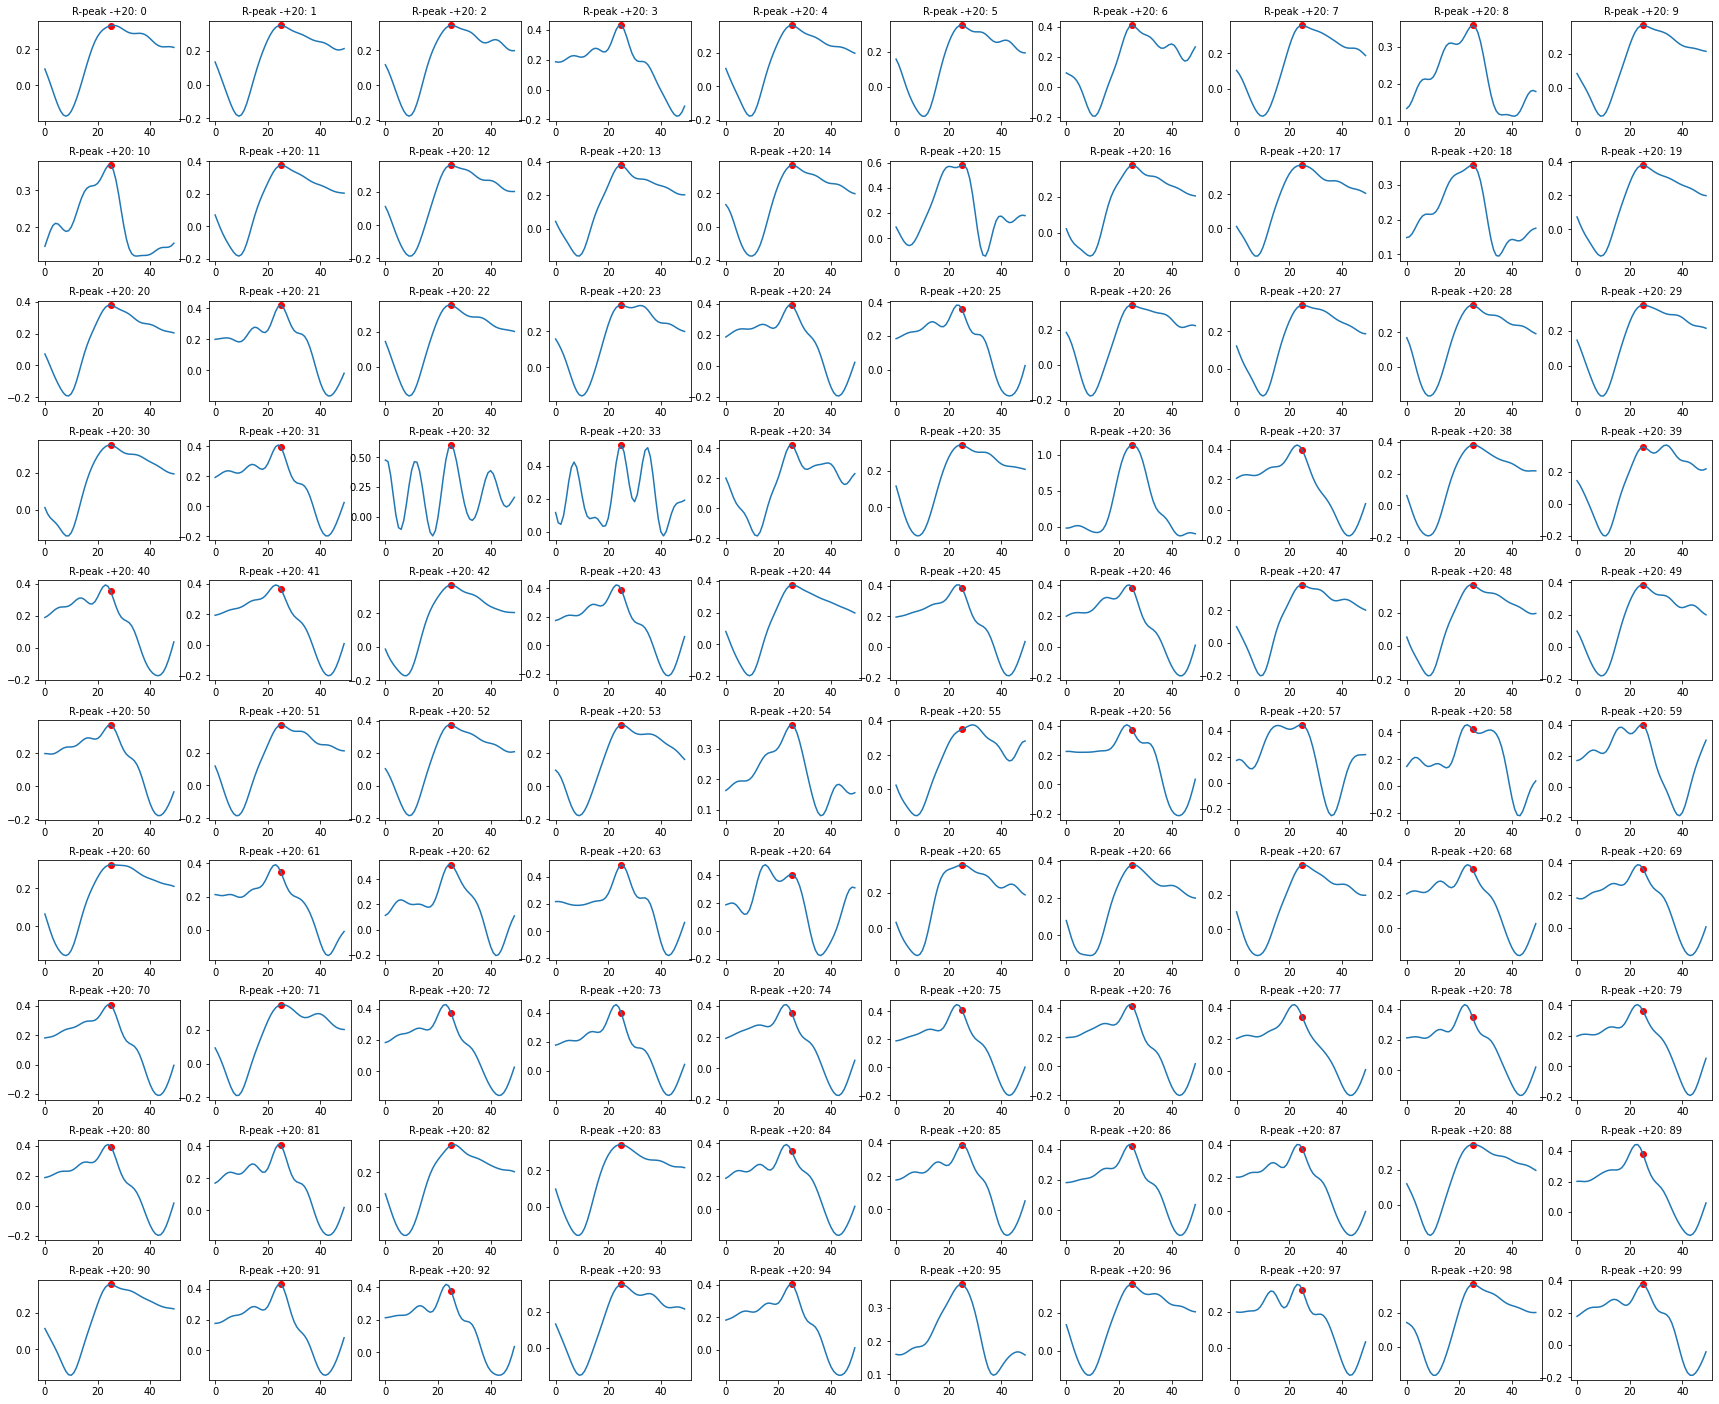

In [235]:
plt.figure(figsize=(30,25))
n = 1 

for i in range(len(arrx_rpeak)):
    ax = plt.subplot(10,10, n)
    plt.subplots_adjust(hspace = 0.4)
    plt.title('R-peak -+20: {}'.format(i), fontsize=10)
    ax.plot(intervalsc[i])
    ax.scatter(len(intervalsc[i])/2,rs[i], c='r')
    n+=1
    if i == 99:
        break

plt.show()

In [242]:
from scipy.spatial import distance

dist_base = np.median(intervalsc)
c_dists=[]
for i in range(len(intervalsc)):
    c_dist = distance.euclidean(intervalsc[i], dist_base)
    c_dists.append(c_dist)

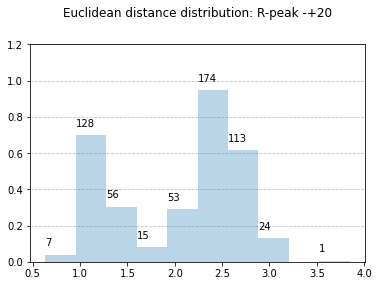

In [288]:
density, bins, _ = plt.hist(c_dists, density=True, alpha=0.3)# , hspace = 0.4)
count_, _ = np.histogram(c_dists, bins)
plt.title('Euclidean distance distribution: R-peak -+20', y=1.1)
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')
plt.ylim(0,1.2)

for x, y, num in zip(bins, density, count):
    if num != 0:
        plt.text(x, y+0.05, num)

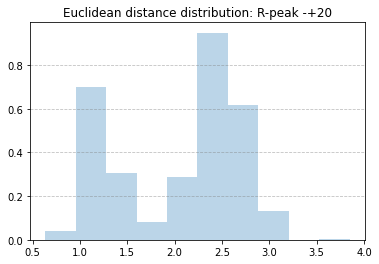

In [269]:
plt.hist(c_dists, density=True, alpha=0.3)
plt.title('Euclidean distance distribution: R-peak -+20')
plt.grid(True, axis='y', color='gray', alpha=0.5, linestyle='--')

In [ ]:
for i in range(len(arrx_rpeak)):
    ax = plt.subplot(10,10, n)
    plt.subplots_adjust(hspace = 0.4)
    plt.title('R-peak -+20: {}'.format(i), fontsize=10)
    ax.plot(intervalsc[i])
    ax.scatter(len(intervalsc[i])/2,rs[i], c='r')
    n+=1
    if i == 99:
        break

plt.show()

In [ ]:
intervalsa = []
rs = []
for i in range(len(arrx_rpeak)):
    #bx = fxvals[int(df['brpeak'].loc[i]-20)]
    #ax = fxvals[int(df['arpeak'].loc[i]-20)]
    intervala = fxvals[int(df['brpeak'].loc[i]):int(df['arpeak'].loc[i])]
    r = fxvals[int(df['rpeak'].loc[i])]
    rs.append(r)
    intervalsa.append(intervala)
    # print(bx, ax)
    # print(interval)
    #plt.plot(interval[i])
    #plt.scatter(df['rpeak'].loc[i], fxvals[int(df['rpeak'].loc[i])], c='r')
    #if break

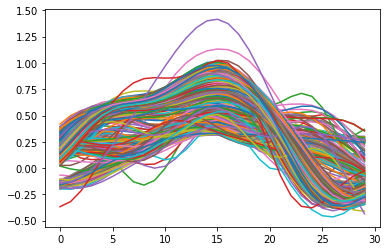

In [136]:
for i in range(len(arrx_rpeak)):
    plt.plot(intervalsa[i])

In [166]:
intervalsb = []
for i in range(len(arrx_rpeak)):
    #bx = fxvals[int(df['brpeak'].loc[i]-20)]
    #ax = fxvals[int(df['arpeak'].loc[i]-20)]
    intervalb = fxvals[int(df['brpeak'].loc[i]-40):int(df['arpeak'].loc[i]+40)]
    intervalsb.append(intervalb)
    # print(bx, ax)
    # print(interval)
    #plt.plot(interval[i])
    #plt.scatter(df['rpeak'].loc[i], fxvals[int(df['rpeak'].loc[i])], c='r')
    #if break

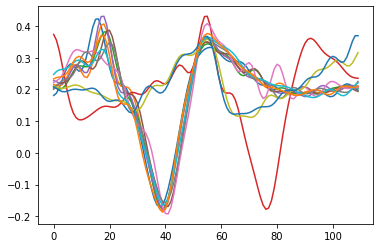

In [167]:
for i in range(len(arrx_rpeak)):
    plt.plot(intervalsb[i])
    if i > 10:
        break

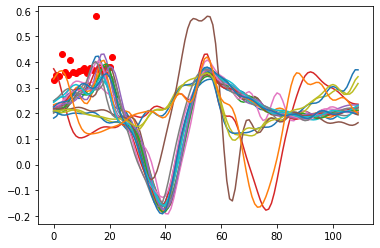

In [180]:
for i in range(len(arrx_rpeak)):
    plt.plot(intervalsb[i])
    plt.scatter(i, fxvals[int(df['rpeak'].loc[i])], c='r')
    if i > 20:
        break

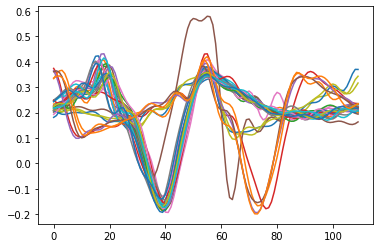

In [169]:
for i in range(len(arrx_rpeak)):
    plt.plot(intervalsb[i])
    if i > 30:
        break

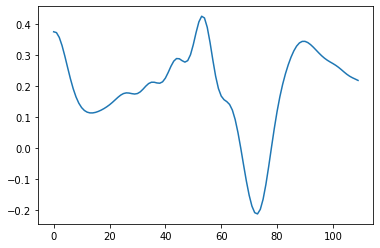

In [176]:
for i in range(len(arrx_rpeak)):
    if i == 43:
        plt.plot(intervalsb[i])
        break

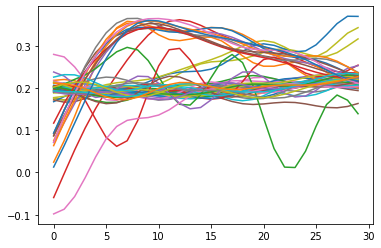

In [158]:
for i in range(len(arrx_rpeak)):
    plt.plot(intervalsb[i])
    if i > 50:
        break

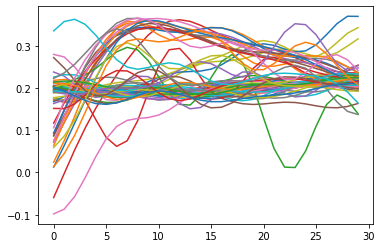

In [159]:
for i in range(len(arrx_rpeak)):
    plt.plot(intervalsb[i])
    if i > 60:
        break

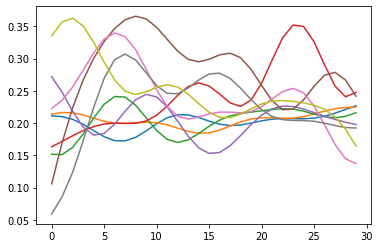

In [163]:
for i in range(len(arrx_rpeak)):
    if 50 < i < 60:
        plt.plot(intervalsb[i])
    
        #break

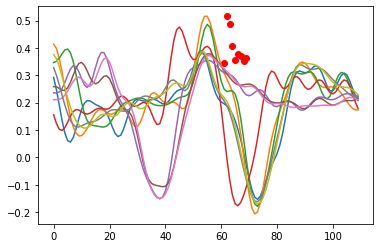

In [179]:
for i in range(len(arrx_rpeak)):
    if 60 < i < 70:
        plt.plot(intervalsb[i])
        plt.scatter(i, fxvals[int(df['rpeak'].loc[i])], c='r')
        #break

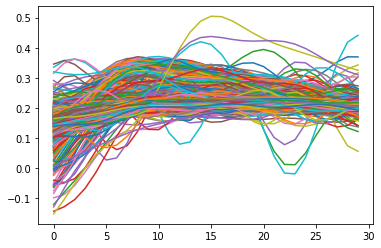

In [150]:
for i in range(len(arrx_rpeak)):
    plt.plot(intervalsb[i])
    if i > 1000:
        break

In [140]:
intervalsb = []
for i in range(len(arrx_rpeak)):
    #bx = fxvals[int(df['brpeak'].loc[i]-20)]
    #ax = fxvals[int(df['arpeak'].loc[i]-20)]
    intervalb = fxvals[int(df['brpeak'].loc[i]-5):int(df['arpeak'].loc[i]+5)]
    intervalsb.append(intervalb)
    # print(bx, ax)
    # print(interval)
    #plt.plot(interval[i])
    #plt.scatter(df['rpeak'].loc[i], fxvals[int(df['rpeak'].loc[i])], c='r')
    #if break

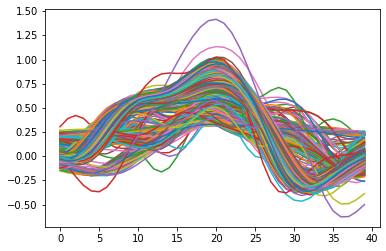

In [141]:
for i in range(len(arrx_rpeak)):
    plt.plot(intervalsb[i])

In [ ]:
[int(df['brpeak'].loc[1])]

In [9]:
pd.DataFrame(tmp['rm_yvals'].describe())#, tmp['fm_yvals'].describe())

,rm_yvals
count,5178.000000
mean,-0.366072
std,0.181370
min,-1.605000
25%,-0.485000
50%,-0.375000
75%,-0.255000
max,0.715000


In [12]:
pd.DataFrame(tmp['fm_yvals'].describe())

,fm_yvals
count,5178.000000
mean,-0.292664
std,0.155050
min,-1.275031
25%,-0.394418
50%,-0.311435
75%,-0.204629
max,0.904823


In [ ]:
# 이전 file에서 사용
# # mit r-r interval

# # load mit rpeak 
# os.chdir('C:\\Users\\MI2RL-KHJ\\workspace_signal\\mit\\norm')
# mit = np.load('rpeak_norm_{}.npy'.format('00'))
# # mits.append(mit)

# m_intervals = []
# for i in range(len(mit)):
#     if i+1 == len(mit):
#         print(i)
#         break
#     interval = mit[i+1] - mit[i]
#     m_intervals.append(interval)

# MIT Files

In [18]:
# Find only mit files 
PATH_IN = r'C:\Users\MI2RL-KHJ\workspace_signal\mit\rpeak_values'

mit_list = [] 
for f_name in os.listdir(PATH_IN):
    if f_name.startswith('mit'):
        mit_list.append(f_name)

## Make R-R intervals table 

In [24]:
# mit_list

# os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\rpeak_values')

# summary = []
# file_names = []
# count = [] 
# mean = [] 
# std = []
# minimum = []
# q1 = []
# IQR = []
# q3 = []
# maximum = []


# for mit_file in mit_list:
#     df = pd.read_csv(mit_file,  index_col='Unnamed: 0')
#     rm_rpeaks = df['rm_xvals']
    
#     file_name = mit_file.split('.')[0]
#     file_names.append(file_name)
    
#     rm_intervals = [] 
#     for i in range(len(rm_rpeaks)):
#         if i+1 == len(rm_rpeaks):
#             #print(i)
#             break
#         interval = rm_rpeaks[i+1] - rm_rpeaks[i]
#         rm_intervals.append(interval)
#     df = pd.DataFrame(rm_intervals, columns = [file_name])

#     count.append(df.describe().iloc[0][0])
#     mean.append(df.describe().iloc[1][0])
#     std.append(df.describe().iloc[2][0])
#     minimum.append(df.describe().iloc[3][0])
#     q1.append(df.describe().iloc[4][0])
#     IQR.append(df.describe().iloc[5][0])
#     q3.append(df.describe().iloc[6][0])
#     maximum.append(df.describe().iloc[7][0])

#     #tmp_s = {file_name: summary}
#     #values.append(summary)
    
#     #pd.DataFrame.from_dict(summary, orient='index').rename(columns={0:file_name}
    
    
    
#     #print(summary)
#     #df = pd.DataFrame(rm_intervals, columns = [file_name])#, index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'] )
#     #a = pd.DataFrame(df.describe())
#     #t= pd.concat([tmp, a], axis=1)
    
    
#     #print(mit_rm_summary)

In [41]:
# summary = {'count':count, 'mean':mean, 'std':std, 'min':minimum, '25%':q1, 'IQR':IQ '75%':q3, 'max':maximum}
# file_names = ['Raw_'+i for i in file_names]
# mit_raw_rrinterval = pd.DataFrame(summary, index=file_names)
# mit_raw_rrinterval 

,count,mean,std,min,25%,IQR,75%,max
Raw_mit_00,5177.0,88.998262,28.147358,59.0,81.0,88.0,96.0,1590.0
Raw_mit_01,3642.0,126.458814,31.006845,76.0,119.0,127.0,134.0,809.0
Raw_mit_02,4781.0,96.362058,14.839985,60.0,85.0,96.0,108.0,161.0
Raw_mit_03,5037.0,91.477268,11.405591,61.0,84.0,93.0,100.0,204.0
Raw_mit_04,5540.0,83.153249,5.956860,64.0,79.0,83.0,87.0,115.0
Raw_mit_05,3622.0,127.204031,20.104355,73.0,112.0,122.5,143.0,281.0
Raw_mit_06,4535.0,101.566042,10.586589,72.0,95.0,101.0,108.0,206.0
Raw_mit_07,4394.0,104.856850,10.342473,72.0,100.0,107.0,112.0,128.0
Raw_mit_08,5230.0,88.095029,16.060972,47.0,81.0,89.0,96.0,154.0
Raw_mit_09,3729.0,123.540628,20.417045,79.0,108.0,121.0,138.0,180.0


In [82]:
## Filtered Mit R-R intervals 
from scipy.spatial import distance
import numpy as np

os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\rpeak_values')

summary = []
file_names = []
count = [] 
mean = [] 
std = []
minimum = []
q1 = []
IQR = []
q3 = []
maximum = []
dist_bases = []
ecl_dists = [] 

for mit_file in mit_list:
    df = pd.read_csv(mit_file,  index_col='Unnamed: 0')
    fm_rpeaks = df['fm_xvals']
    
    file_name = mit_file.split('.')[0]
    file_names.append(file_name)

    fm_intervals = [] 
    for i in range(len(fm_rpeaks)):
        if i+1 == len(fm_rpeaks):
            #print(i)
            break
        interval = fm_rpeaks[i+1] - fm_rpeaks[i]
        fm_intervals.append(interval)
    
    # Euclidean 
    dist_base = np.median(fm_intervals) # equal to IQR.append(df.describe().iloc[5][0])
    ecl_dist = distance.euclidean(fm_intervals, dist_base)
    
    dist_bases.append(dist_base) 
    ecl_dists.append(ecl_dist)
    
    df = pd.DataFrame(fm_intervals, columns = [file_name])
       
    count.append(df.describe().iloc[0][0])
    mean.append(df.describe().iloc[1][0])
    std.append(df.describe().iloc[2][0])
    minimum.append(df.describe().iloc[3][0])
    q1.append(df.describe().iloc[4][0])
    IQR.append(df.describe().iloc[5][0])
    q3.append(df.describe().iloc[6][0])
    maximum.append(df.describe().iloc[7][0])
    

In [83]:
# summary = {'count':count, 'mean':mean, 'std':std, 'min':minimum, '25%':q1, 'IQR':IQR, '75%':q3, 'max':maximum}
# file_names = ['Filtered_'+i for i in file_names]
# mit_filtered_rrinterval = pd.DataFrame(summary, index=file_names)
# mit_filtered_rrinterval 

summary = {'count':count, 'mean':mean, 'std':std, 'min':minimum, '25%':q1, 'IQR':IQR, '75%':q3, 'max':maximum, 'Euclidean':ecl_dists}
file_names = ['R-R interval_'+i for i in file_names]
mit_filtered_rrinterval = pd.DataFrame(summary, index=file_names)
mit_filtered_rrinterval 

,count,mean,std,min,25%,IQR,75%,max,Euclidean
R-R interval_mit_00,5177.0,88.998262,28.147358,59.0,81.0,88.0,96.0,1590.0,2026.318830
R-R interval_mit_01,3642.0,126.458814,31.006845,76.0,119.0,127.0,134.0,809.0,1871.259736
R-R interval_mit_02,4781.0,96.362058,14.839985,60.0,85.0,96.0,108.0,161.0,1026.305510
R-R interval_mit_03,5037.0,91.477268,11.405591,61.0,84.0,93.0,100.0,204.0,816.578227
R-R interval_mit_04,5540.0,83.153249,5.956860,64.0,79.0,83.0,87.0,115.0,443.482807
R-R interval_mit_05,3622.0,127.204031,20.104355,73.0,112.0,122.5,143.0,281.0,1242.457846
R-R interval_mit_06,4535.0,101.566042,10.586589,72.0,95.0,101.0,108.0,206.0,713.866234
R-R interval_mit_07,4394.0,104.856850,10.342473,72.0,100.0,107.0,112.0,128.0,700.062140
R-R interval_mit_08,5230.0,88.095029,16.060972,47.0,81.0,89.0,96.0,154.0,1163.240732
R-R interval_mit_09,3729.0,123.540628,20.417045,79.0,108.0,121.0,138.0,180.0,1256.227686


## Make mit yval tables 

In [50]:
# mit_list

# os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\rpeak_values')

# yval = pd.DataFrame()
# summary = []
# file_names = []
# count = [] 
# mean = [] 
# std = []
# minimum = []
# q1 = []
# IQR = []
# q3 = []
# maximum = []


# for mit_file in mit_list:
#     df = pd.read_csv(mit_file,  index_col='Unnamed: 0')
#     rm_yval = pd.DataFrame(df['rm_yvals'])
    
#     #print(rm_yval.describe())
    
#     file_name = mit_file.split('.')[0]
#     file_names.append(file_name)
    
#     count.append(rm_yval.describe().iloc[0][0])
#     mean.append(rm_yval.describe().iloc[1][0])
#     std.append(rm_yval.describe().iloc[2][0])
#     minimum.append(rm_yval.describe().iloc[3][0])
#     q1.append(rm_yval.describe().iloc[4][0])
#     IQR.append(rm_yval.describe().iloc[5][0])
#     q3.append(rm_yval.describe().iloc[6][0])
#     maximum.append(rm_yval.describe().iloc[7][0])

In [53]:
summary = {'count':count, 'mean':mean, 'std':std, 'min':minimum, '25%':q1, 'IQR':IQR, '75%':q3, 'max':maximum}
file_names = ['Raw_yvals_'+i for i in file_names]
mit_raw_yvals = pd.DataFrame(summary, index=file_names)
mit_raw_yvals

,count,mean,std,min,25%,IQR,75%,max
Raw_yvals_mit_00,5178.0,-0.366072,0.181370,-1.605,-0.485,-0.375,-0.255,0.715
Raw_yvals_mit_01,3643.0,-0.123024,0.103346,-0.635,-0.195,-0.115,-0.045,0.315
Raw_yvals_mit_02,4782.0,0.281897,0.139691,-1.435,0.235,0.305,0.355,0.775
Raw_yvals_mit_03,5038.0,-0.081905,0.086228,-1.095,-0.125,-0.075,-0.035,0.435
Raw_yvals_mit_04,5541.0,-1.413637,0.681190,-2.445,-1.855,-1.615,-1.285,0.435
Raw_yvals_mit_05,3623.0,-0.217098,0.331297,-0.935,-0.525,-0.115,0.015,0.575
Raw_yvals_mit_06,4536.0,0.039541,0.249350,-0.685,-0.155,0.025,0.225,0.795
Raw_yvals_mit_07,4395.0,-1.194695,0.228734,-1.875,-1.355,-1.215,-1.055,-0.175
Raw_yvals_mit_08,5231.0,-0.083775,0.399552,-1.855,-0.055,0.045,0.115,0.955
Raw_yvals_mit_09,3730.0,0.161043,0.116909,-1.855,0.105,0.165,0.225,1.075


In [79]:
## Raw + Filtered mit y_vals 

os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\rpeak_values')


yval = pd.DataFrame()

summary = []
file_names = []

rm_count = [] 
rm_mean = [] 
rm_std = []
rm_minimum = []
rm_q1 = []
rm_IQR = []
rm_q3 = []
rm_maximum = []
rm_dist_bases = []
rm_ecl_dists = []

fm_count = [] 
fm_mean = [] 
fm_std = []
fm_minimum = []
fm_q1 = []
fm_IQR = []
fm_q3 = []
fm_maximum = []
fm_dist_bases = []
fm_ecl_dists = []

for mit_file in mit_list:
    df = pd.read_csv(mit_file,  index_col='Unnamed: 0')
    rm_yval = pd.DataFrame(df['rm_yvals'])
    fm_yval = pd.DataFrame(df['fm_yvals'])
    
    #print(rm_yval.describe())
    file_name = mit_file.split('.')[0]
    file_names.append(file_name)
    
    # Euclidean: Raw
    rm_dist_base = np.median(df['rm_yvals']) # equal to IQR.append(df.describe().iloc[5][0])
    rm_ecl_dist = distance.euclidean(df['rm_yvals'], rm_dist_base)
    
    rm_dist_bases.append(rm_dist_base) 
    rm_ecl_dists.append(rm_ecl_dist)
    
    # Euclidean: Filtered
    fm_dist_base = np.median(df['fm_yvals']) # equal to IQR.append(df.describe().iloc[5][0])
    fm_ecl_dist = distance.euclidean(df['fm_yvals'], fm_dist_base)
    
    fm_dist_bases.append(fm_dist_base) 
    fm_ecl_dists.append(fm_ecl_dist)
    
    
    # rm_yval
    rm_count.append(rm_yval.describe().iloc[0][0])
    rm_mean.append(rm_yval.describe().iloc[1][0])
    rm_std.append(rm_yval.describe().iloc[2][0])
    rm_minimum.append(rm_yval.describe().iloc[3][0])
    rm_q1.append(rm_yval.describe().iloc[4][0])
    rm_IQR.append(rm_yval.describe().iloc[5][0])
    rm_q3.append(rm_yval.describe().iloc[6][0])
    rm_maximum.append(rm_yval.describe().iloc[7][0])
    
    # fm_yval
    fm_count.append(fm_yval.describe().iloc[0][0])
    fm_mean.append(fm_yval.describe().iloc[1][0])
    fm_std.append(fm_yval.describe().iloc[2][0])
    fm_minimum.append(fm_yval.describe().iloc[3][0])
    fm_q1.append(fm_yval.describe().iloc[4][0])
    fm_IQR.append(fm_yval.describe().iloc[5][0])
    fm_q3.append(fm_yval.describe().iloc[6][0])
    fm_maximum.append(fm_yval.describe().iloc[7][0])

In [81]:
# summary = {'count':count, 'mean':mean, 'std':std, 'min':minimum, '25%':q1, 'IQR':IQR, '75%':q3, 'max':maximum}
summary = {'RM-count':rm_count, 'FM-count':fm_count, 'RM-mean':rm_mean, 'FM-mean':fm_mean, 'RM-std':rm_std, 'FM-std':fm_std, 'RM-min':rm_minimum, 'FM-min':fm_minimum, 
           'RM-25%':rm_q1, 'FM-25%':fm_q1,  'RM-IQR':rm_IQR, 'FM-IQR':fm_IQR, 'RM-75%':rm_q3, 'FM-75%':fm_q3, 'RM-max':rm_maximum, 'FM-max':fm_maximum, 
           'RM-Euclidean':rm_ecl_dists, 'FM-Euclidean':fm_ecl_dists}
file_names = ['yvals_'+i for i in file_names]
mit_yvals = pd.DataFrame(summary, index=file_names)
mit_yvals

,RM-count,FM-count,RM-mean,FM-mean,RM-std,FM-std,RM-min,FM-min,RM-25%,FM-25%,RM-IQR,FM-IQR,RM-75%,FM-75%,RM-max,FM-max,RM-Euclidean,FM-Euclidean
yvals_mit_00,5178.0,5178.0,-0.366072,-0.292664,0.181370,0.155050,-1.605,-1.275031,-0.485,-0.394418,-0.375,-0.311435,-0.255,-0.204629,0.715,0.904823,13.065623,11.237566
yvals_mit_01,3643.0,3643.0,-0.123024,0.058620,0.103346,0.077072,-0.635,-0.257222,-0.195,0.011449,-0.115,0.064955,-0.045,0.113665,0.315,0.350839,6.255597,4.666915
yvals_mit_02,4782.0,4782.0,0.281897,0.464485,0.139691,0.126262,-1.435,-1.262918,0.235,0.430647,0.305,0.482675,0.355,0.526371,0.775,0.796339,9.790107,8.820501
yvals_mit_03,5038.0,5038.0,-0.081905,0.162622,0.086228,0.065912,-1.095,-0.720971,-0.125,0.134652,-0.075,0.169743,-0.035,0.197442,0.435,0.466475,6.139318,4.705112
yvals_mit_04,5541.0,5541.0,-1.413637,-0.846024,0.681190,0.622015,-2.445,-1.810619,-1.855,-1.268767,-1.615,-1.009288,-1.285,-0.686336,0.435,0.731019,52.870987,47.865805
yvals_mit_05,3623.0,3623.0,-0.217098,0.054364,0.331297,0.269299,-0.935,-0.615514,-0.525,-0.175030,-0.115,0.127733,0.015,0.255587,0.575,0.665323,20.864046,16.798159
yvals_mit_06,4536.0,4536.0,0.039541,0.293203,0.249350,0.190831,-0.685,-0.260319,-0.155,0.148600,0.025,0.278597,0.225,0.428496,0.795,0.937324,16.820369,12.888592
yvals_mit_07,4395.0,4395.0,-1.194695,-0.800025,0.228734,0.184949,-1.875,-1.310492,-1.355,-0.927208,-1.215,-0.793015,-1.055,-0.672680,-0.175,-0.108807,15.221800,12.268569
yvals_mit_08,5231.0,5231.0,-0.083775,0.220992,0.399552,0.387687,-1.855,-1.360098,-0.055,0.186159,0.045,0.320077,0.115,0.445562,0.955,0.937191,30.359018,28.938410
yvals_mit_09,3730.0,3730.0,0.161043,0.225048,0.116909,0.070481,-1.855,-0.211430,0.105,0.175285,0.165,0.224499,0.225,0.272876,1.075,0.457887,7.143221,4.304119


####

# Hamilton Files 

In [85]:
# Find only mit files 
PATH_IN = r'C:\Users\MI2RL-KHJ\workspace_signal\mit\rpeak_values'

hamilton_list = [] 
for f_name in os.listdir(PATH_IN):
    if f_name.startswith('hamilton'):
        hamilton_list.append(f_name)

In [116]:
## Raw + Filtered hamilton y_vals 

os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\rpeak_values')

yval = pd.DataFrame()

summary = []
file_names = []

rh_count = [] 
rh_mean = [] 
rh_std = []
rh_minimum = []
rh_q1 = []
rh_IQR = []
rh_q3 = []
rh_maximum = []
rh_dist_bases = []
rh_ecl_dists = []

fh_count = [] 
fh_mean = [] 
fh_std = []
fh_minimum = []
fh_q1 = []
fh_IQR = []
fh_q3 = []
fh_maximum = []
fh_dist_bases = []
fh_ecl_dists = []

for hamilton_file in hamilton_list:

    df = pd.read_csv(hamilton_file,  index_col='Unnamed: 0')
    rh_yval = pd.DataFrame(df['rh_xvals'])
    fh_yval = pd.DataFrame(df['fh_xvals'])
    
    #print(rh_yval.describe())
    file_name = hamilton_file.split('.')[0]
    file_names.append(file_name)
    
    # Euclidean: Raw
    rh_dist_base = np.median(df['rh_xvals']) # equal to IQR.append(df.describe().iloc[5][0])
    rh_ecl_dist = distance.euclidean(df['rh_xvals'], rh_dist_base)
    
    rh_dist_bases.append(rh_dist_base) 
    rh_ecl_dists.append(rh_ecl_dist)
    
    # Euclidean: Filtered
    fh_dist_base = np.median(df['fh_yvals']) # equal to IQR.append(df.describe().iloc[5][0])
    fh_ecl_dist = distance.euclidean(df['fh_yvals'], fh_dist_base)
    
    fh_dist_bases.append(fh_dist_base) 
    fh_ecl_dists.append(fh_ecl_dist)
    
    
    # rh_yval
    rh_count.append(rh_yval.describe().iloc[0][0])
    rh_mean.append(rh_yval.describe().iloc[1][0])
    rh_std.append(rh_yval.describe().iloc[2][0])
    rh_minimum.append(rh_yval.describe().iloc[3][0])
    rh_q1.append(rh_yval.describe().iloc[4][0])
    rh_IQR.append(rh_yval.describe().iloc[5][0])
    rh_q3.append(rh_yval.describe().iloc[6][0])
    rh_maximum.append(rh_yval.describe().iloc[7][0])
    
    # fh_yval
    fh_count.append(fh_yval.describe().iloc[0][0])
    fh_mean.append(fh_yval.describe().iloc[1][0])
    fh_std.append(fh_yval.describe().iloc[2][0])
    fh_minimum.append(fh_yval.describe().iloc[3][0])
    fh_q1.append(fh_yval.describe().iloc[4][0])
    fh_IQR.append(fh_yval.describe().iloc[5][0])
    fh_q3.append(fh_yval.describe().iloc[6][0])
    fh_maximum.append(fh_yval.describe().iloc[7][0])

In [117]:
# summary = {'count':count, 'mean':mean, 'std':std, 'min':minimum, '25%':q1, 'IQR':IQR, '75%':q3, 'max':maximum}
summary = {'RH-count':rh_count, 'FHcount':fh_count, 'RH-mean':rh_mean, 'FH-mean':fh_mean, 'RH-std':rh_std, 'FH-std':fh_std, 'RH-min':rh_minimum, 'FH-min':fh_minimum, 
           'RH-25%':rh_q1, 'FH-25%':fh_q1,  'RH-IQR':rh_IQR, 'FH-IQR':fh_IQR, 'RH-75%':rh_q3, 'FH-75%':fh_q3, 'RH-max':rh_maximum, 'FH-max':fh_maximum, 
           'RH-Euclidean':rh_ecl_dists, 'FH-Euclidean':fh_ecl_dists}
file_names = ['R-R Interval_'+i for i in file_names]
hamilton_rr = pd.DataFrame(summary, index=file_names)
hamilton_rr

,RH-count,FHcount,RH-mean,FH-mean,RH-std,FH-std,RH-min,FH-min,RH-25%,FH-25%,RH-IQR,FH-IQR,RH-75%,FH-75%,RH-max,FH-max,RH-Euclidean,FH-Euclidean
R-R Interval_hamilton_00,5157.0,5157.0,231474.648245,231474.648245,134494.495575,134494.495575,116.0,116.0,113194.00,113194.00,230782.0,230782.0,349504.00,349504.00,460681.0,460681.0,9.657545e+06,14.062555
R-R Interval_hamilton_01,3728.0,3728.0,232210.167382,232210.167382,131411.956310,131411.956310,123.0,123.0,120929.25,120929.25,235364.0,235364.0,345204.75,345204.75,460686.0,460686.0,8.024900e+06,2.571953
R-R Interval_hamilton_02,4787.0,4787.0,236106.892626,236106.892626,132890.023556,132890.023556,28.0,28.0,126334.00,126334.00,232545.0,232545.0,353358.50,353358.50,460735.0,460735.0,9.196757e+06,3.383408
R-R Interval_hamilton_03,5042.0,5042.0,233392.119794,233392.119794,129763.651720,129763.651720,30.0,30.0,129641.50,129641.50,230629.0,230629.0,344635.00,344635.00,460712.0,460712.0,9.215308e+06,2.710804
R-R Interval_hamilton_04,5542.0,5542.0,229750.511007,229750.511007,133510.326422,133510.326422,42.0,42.0,112432.25,112432.25,232148.5,232148.5,344743.50,344743.50,460715.0,460715.0,9.939831e+06,4.166577
R-R Interval_hamilton_05,3624.0,3624.0,232823.943433,232823.943433,133824.282017,133824.282017,130.0,130.0,116757.75,116757.75,233832.0,233832.0,350232.50,350232.50,460747.0,460747.0,8.055294e+06,5.717522
R-R Interval_hamilton_06,4538.0,4538.0,231301.335390,231301.335390,132940.419019,132940.419019,71.0,71.0,116122.00,116122.00,231373.5,231373.5,347841.25,347841.25,460676.0,460676.0,8.954503e+06,7.098578
R-R Interval_hamilton_07,4394.0,4394.0,223997.976331,223997.976331,133074.047127,133074.047127,110.0,110.0,107424.00,107424.00,218933.5,218933.5,339335.00,339335.00,460743.0,460743.0,8.826496e+06,5.684199
R-R Interval_hamilton_08,5230.0,5230.0,243264.541491,243264.541491,137419.231402,137419.231402,112.0,112.0,123639.75,123639.75,248342.5,248342.5,366299.75,366299.75,460694.0,460694.0,9.943819e+06,6.360379
R-R Interval_hamilton_09,3732.0,3732.0,240566.462219,240566.462219,135668.578551,135668.578551,71.0,71.0,118648.75,118648.75,245770.0,245770.0,362831.50,362831.50,460622.0,460622.0,8.292991e+06,3.388725


## Hamilton yvals table

In [108]:
## Raw + Filtered hamilton y_vals 

os.chdir(r'C:\Users\MI2RL-KHJ\workspace_signal\mit\rpeak_values')

yval = pd.DataFrame()

summary = []
file_names = []

rh_count = [] 
rh_mean = [] 
rh_std = []
rh_minimum = []
rh_q1 = []
rh_IQR = []
rh_q3 = []
rh_maximum = []
rh_dist_bases = []
rh_ecl_dists = []

fh_count = [] 
fh_mean = [] 
fh_std = []
fh_minimum = []
fh_q1 = []
fh_IQR = []
fh_q3 = []
fh_maximum = []
fh_dist_bases = []
fh_ecl_dists = []

for hamilton_file in hamilton_list:

    df = pd.read_csv(hamilton_file,  index_col='Unnamed: 0')
    rh_yval = pd.DataFrame(df['rh_yvals'])
    fh_yval = pd.DataFrame(df['fh_yvals'])
    
    #print(rh_yval.describe())
    file_name = hamilton_file.split('.')[0]
    file_names.append(file_name)
    
    # Euclidean: Raw
    rh_dist_base = np.median(df['rh_yvals']) # equal to IQR.append(df.describe().iloc[5][0])
    rh_ecl_dist = distance.euclidean(df['rh_yvals'], rh_dist_base)
    
    rh_dist_bases.append(rh_dist_base) 
    rh_ecl_dists.append(rh_ecl_dist)
    
    # Euclidean: Filtered
    fh_dist_base = np.median(df['fh_yvals']) # equal to IQR.append(df.describe().iloc[5][0])
    fh_ecl_dist = distance.euclidean(df['fh_yvals'], fh_dist_base)
    
    fh_dist_bases.append(fh_dist_base) 
    fh_ecl_dists.append(fh_ecl_dist)
    
    
    # rh_yval
    rh_count.append(rh_yval.describe().iloc[0][0])
    rh_mean.append(rh_yval.describe().iloc[1][0])
    rh_std.append(rh_yval.describe().iloc[2][0])
    rh_minimum.append(rh_yval.describe().iloc[3][0])
    rh_q1.append(rh_yval.describe().iloc[4][0])
    rh_IQR.append(rh_yval.describe().iloc[5][0])
    rh_q3.append(rh_yval.describe().iloc[6][0])
    rh_maximum.append(rh_yval.describe().iloc[7][0])
    
    # fh_yval
    fh_count.append(fh_yval.describe().iloc[0][0])
    fh_mean.append(fh_yval.describe().iloc[1][0])
    fh_std.append(fh_yval.describe().iloc[2][0])
    fh_minimum.append(fh_yval.describe().iloc[3][0])
    fh_q1.append(fh_yval.describe().iloc[4][0])
    fh_IQR.append(fh_yval.describe().iloc[5][0])
    fh_q3.append(fh_yval.describe().iloc[6][0])
    fh_maximum.append(fh_yval.describe().iloc[7][0])

In [109]:
# summary = {'count':count, 'mean':mean, 'std':std, 'min':minimum, '25%':q1, 'IQR':IQR, '75%':q3, 'max':maximum}
summary = {'RH-count':rh_count, 'FHcount':fh_count, 'RH-mean':rh_mean, 'FH-mean':fh_mean, 'RH-std':rh_std, 'FH-std':fh_std, 'RH-min':rh_minimum, 'FH-min':fh_minimum, 
           'RH-25%':rh_q1, 'FH-25%':fh_q1,  'RH-IQR':rh_IQR, 'FH-IQR':fh_IQR, 'RH-75%':rh_q3, 'FH-75%':fh_q3, 'RH-max':rh_maximum, 'FH-max':fh_maximum, 
           'RH-Euclidean':rh_ecl_dists, 'FH-Euclidean':fh_ecl_dists}
file_names = ['yvals_'+i for i in file_names]
hamilton_yvals = pd.DataFrame(summary, index=file_names)
hamilton_yvals

,RH-count,FHcount,RH-mean,FH-mean,RH-std,FH-std,RH-min,FH-min,RH-25%,FH-25%,RH-IQR,FH-IQR,RH-75%,FH-75%,RH-max,FH-max,RH-Euclidean,FH-Euclidean
yvals_hamilton_00,5157.0,5157.0,0.363280,0.463561,0.244413,0.192742,-0.355,0.114671,0.1850,0.311511,0.325,0.428850,0.515,0.586887,2.245,1.757368,17.764118,14.062555
yvals_hamilton_01,3728.0,3728.0,0.042900,0.203081,0.072121,0.041968,-0.235,0.081664,0.0050,0.177965,0.035,0.199395,0.065,0.220770,0.915,0.714401,4.429278,2.571953
yvals_hamilton_02,4787.0,4787.0,0.329328,0.511273,0.070912,0.048894,-0.015,0.126150,0.2850,0.478463,0.325,0.510140,0.365,0.542875,1.145,1.037695,4.914916,3.383408
yvals_hamilton_03,5042.0,5042.0,-0.024866,0.214179,0.059915,0.037971,-0.435,0.098427,-0.0550,0.189936,-0.025,0.210190,0.005,0.232749,1.125,0.822980,4.253966,2.710804
yvals_hamilton_04,5542.0,5542.0,0.084013,0.626484,0.072646,0.055906,-0.185,0.386080,0.0450,0.589286,0.085,0.623727,0.125,0.660998,1.225,1.121794,5.408096,4.166577
yvals_hamilton_05,3624.0,3624.0,0.351225,0.505905,0.083785,0.088689,0.135,0.348083,0.2950,0.410223,0.335,0.539917,0.425,0.583588,0.585,0.704693,5.136847,5.717522
yvals_hamilton_06,4538.0,4538.0,0.386377,0.651288,0.150092,0.104871,-0.025,0.358558,0.2850,0.584135,0.375,0.640869,0.465,0.700232,1.405,1.594092,10.138792,7.098578
yvals_hamilton_07,4394.0,4394.0,0.143452,0.490716,0.085378,0.085624,-0.075,0.251886,0.0850,0.424471,0.135,0.485872,0.195,0.556648,1.095,0.983196,5.686475,5.684199
yvals_hamilton_08,5230.0,5230.0,0.487859,0.754656,0.109501,0.087860,-0.095,0.158304,0.4250,0.697031,0.495,0.750511,0.555,0.807458,1.385,1.326557,7.935030,6.360379
yvals_hamilton_09,3732.0,3732.0,0.326468,0.392562,0.104018,0.055347,-1.795,0.185057,0.2850,0.362272,0.335,0.396380,0.375,0.426937,1.155,0.882402,6.374967,3.388725


In [100]:
{'MIT R-R intervals': mit_filtered_rrinterval['Euclidean'].values}

{'MIT R-R intervals': array([2026.3188298 , 1871.25973611, 1026.30551007,  816.5782265 ,
         443.48280688, 1242.45784637,  713.86623397,  700.0621401 ,
        1163.24073175, 1256.22768637,  591.63924819,  756.6174727 ,
         733.88623096, 2187.84871506, 1139.06057784,  959.6848441 ,
        1015.44276057, 1835.49584581])}

In [140]:
normal_rrintervals = pd.DataFrame({'MIT R-R intervals': mit_filtered_rrinterval['Euclidean'].values, 'Hamilton Raw R-R intervals': np.round(hamilton_rr['RH-Euclidean'].values,2), 'Hamilton filtered R-R intervals': np.round(hamilton_rr['FH-Euclidean'].values,6)}, index=final_name)

In [141]:
normal_rrintervals

,MIT R-R intervals,Hamilton Raw R-R intervals,Hamilton filtered R-R intervals
00,2026.318830,9657544.66,14.062555
01,1871.259736,8024900.33,2.571953
02,1026.305510,9196756.85,3.383408
03,816.578227,9215308.14,2.710804
04,443.482807,9939830.67,4.166577
05,1242.457846,8055294.32,5.717522
06,713.866234,8954503.22,7.098578
07,700.062140,8826495.87,5.684199
08,1163.240732,9943818.74,6.360379
09,1256.227686,8292990.98,3.388725


#

In [373]:
# Useful 

#1
pd.DataFrame.from_dict(summary, orient='index').rename(columns={0:file_name})


#2 
summary = {}
summary['count'] = df.describe().iloc[0][0]
summary['mean'] = df.describe().iloc[1][0]
summary['std'] = df.describe().iloc[2][0]
summary['min'] = df.describe().iloc[3][0]
summary['25%'] = df.describe().iloc[4][0]
summary['50%'] = df.describe().iloc[5][0]
summary['75%'] = df.describe().iloc[6][0]
summary['max'] = df.describe().iloc[7][0]

# 3
mit_rm_summary = pd.DataFrame(index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])
mit_rm_summary

# 4 
re = pd.DataFrame()
re.keys = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']


# 5
re = dict(zip(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], 
         [df.describe().iloc[0][0], df.describe().iloc[1][0], df.describe().iloc[2][0], df.describe().iloc[3][0], 
          df.describe().iloc[4][0],df.describe().iloc[5][0], df.describe().iloc[6][0], df.describe().iloc[7][0]]))

df.describe().iloc[0][0]
#a.iloc[0][0]


[{'count': 4781.0,
  'mean': 96.3620581468312,
  'std': 14.839985263640598,
  'min': 60.0,
  '25%': 85.0,
  '50%': 96.0,
  '75%': 108.0,
  'max': 161.0},
 {'count': 4781.0,
  'mean': 96.3620581468312,
  'std': 14.839985263640598,
  'min': 60.0,
  '25%': 85.0,
  '50%': 96.0,
  '75%': 108.0,
  'max': 161.0},
 {'count': 4781.0,
  'mean': 96.3620581468312,
  'std': 14.839985263640598,
  'min': 60.0,
  '25%': 85.0,
  '50%': 96.0,
  '75%': 108.0,
  'max': 161.0}]

In [376]:
pd.DataFrame.from_dict(values[1], orient='index').rename(columns={0:file_name})

,mit_02
count,4781.000000
mean,96.362058
std,14.839985
min,60.000000
25%,85.000000
50%,96.000000
75%,108.000000
max,161.000000


In [370]:
values

[{'count': 4781.0,
  'mean': 96.3620581468312,
  'std': 14.839985263640598,
  'min': 60.0,
  '25%': 85.0,
  '50%': 96.0,
  '75%': 108.0,
  'max': 161.0},
 {'count': 4781.0,
  'mean': 96.3620581468312,
  'std': 14.839985263640598,
  'min': 60.0,
  '25%': 85.0,
  '50%': 96.0,
  '75%': 108.0,
  'max': 161.0},
 {'count': 4781.0,
  'mean': 96.3620581468312,
  'std': 14.839985263640598,
  'min': 60.0,
  '25%': 85.0,
  '50%': 96.0,
  '75%': 108.0,
  'max': 161.0}]

In [357]:
summ = []
summ.append(summary.values())

In [362]:
pd.concat({k: pd.Series(v) for k, v in summary.items()}, axis=1)#.reset_index(file_name)

,count,mean,std,min,25%,50%,75%,max
0,4781.0,96.362058,14.839985,60.0,85.0,96.0,108.0,161.0


In [363]:
summary

{'count': 4781.0,
 'mean': 96.3620581468312,
 'std': 14.839985263640598,
 'min': 60.0,
 '25%': 85.0,
 '50%': 96.0,
 '75%': 108.0,
 'max': 161.0}

In [360]:
file_name

'mit_02'

In [339]:
file_name = summary.values()

In [346]:
file_name = mit_file.split('.')[0]

In [350]:
pd.DataFrame(summary.values(), index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], columns= [file_name])


,mit_02
count,4781.000000
mean,96.362058
std,14.839985
min,60.000000
25%,85.000000
50%,96.000000
75%,108.000000
max,161.000000


In [ ]:
#mit_rm_summary#, index = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'] )

In [ ]:
    # summary = df.describe()['mean'], df.describe()['std'], df.describe()['min'], 
               #df.describe()['25%'], df.describe()['50%'], df.describe()['75%'], df.describe()['max']]
   # df.decribe()[]
    #print(summary.count())
    #print(summary)
    #mit_rm_summary.loc[:,file_name] = 
    #mit_summary = mit_summary.append(summary)
#    globals()[file_name]= rm_intervals.describe()

In [157]:
#     summary['count'] = df.describe().iloc[0][0]
#     summary['mean'] = df.describe().iloc[1][0]
#     summary['std'] = df.describe().iloc[2][0]
#     summary['min'] = df.describe().iloc[3][0]
#     summary['25%'] = df.describe().iloc[4][0]
#     summary['50%'] = df.describe().iloc[5][0]
#     summary['75%'] = df.describe().iloc[6][0]
#     summary['max'] = df.describe().iloc[7][0]

0                mit_00
count  5177.000000
mean    ...
Name: mit_00, dtype: object